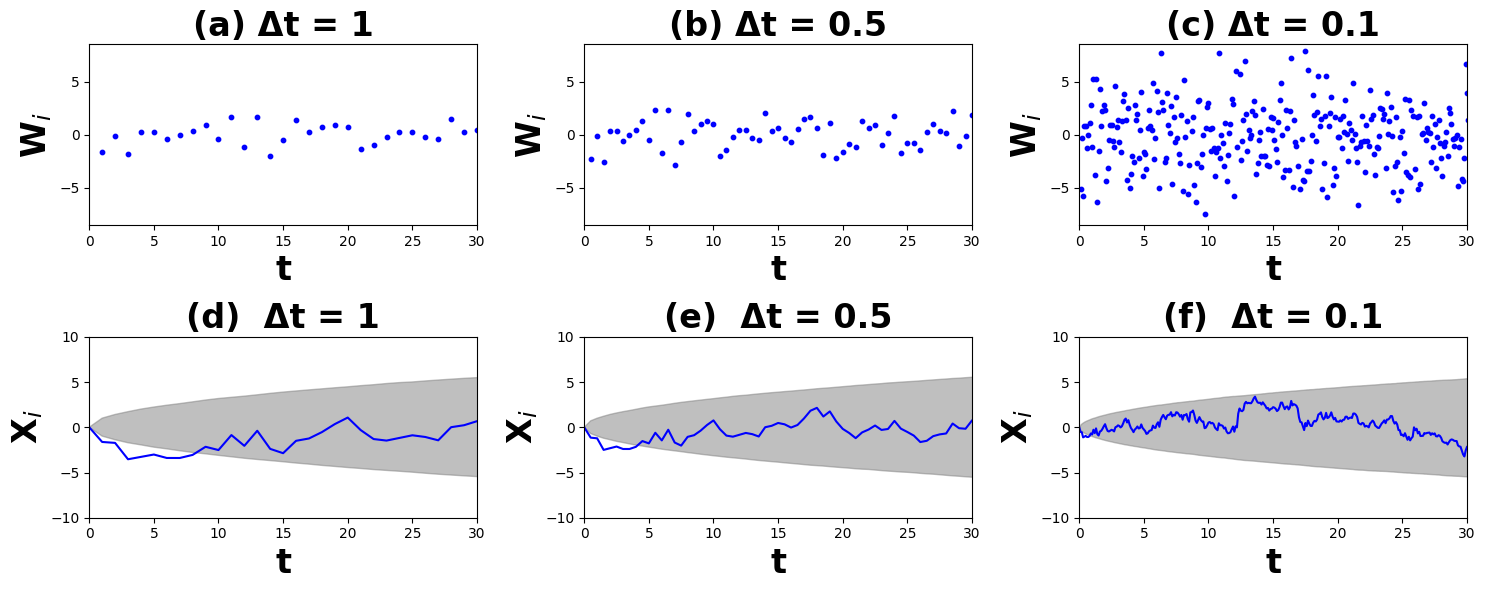

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def simulate_motion(N, Dt):
    np.random.seed(55)
    random_walk = np.random.randn(N - 1)
    x = np.cumsum(np.insert(random_walk, 0, 0)) * np.sqrt(Dt)  # Scale by sqrt of Dt
    return x

def simulate_many_motions(N, num_realizations, Dt):
    # Simulate many instances of the motion
    np.random.seed(55)
    all_walks = np.random.randn(N - 1, num_realizations)
    x = np.cumsum(np.insert(all_walks, 0, 0, axis=0), axis=0) * np.sqrt(Dt)
    return x

def calculate_statistics(x):
    # Calculate mean and standard deviation across realizations
    mean_x = np.mean(x, axis=1)
    std_dev_x = np.std(x, axis=1)
    return mean_x, std_dev_x

def calculate_Wi(x, Dt):
    # Calculate velocity as the difference in position over time
    W = np.diff(x) / Dt
    return W

# Define parameters for simulation
N = 900  # Number of samples, for demonstration
num_realizations = 10000  # Number of realizations for mean and standard deviation
timesteps = [1, 0.5, 0.1]  # Timesteps to be used for the subplots
txt = ["a", "b", "c"] #titles for the functions 
txt2 = ["d", "e", "f"] # Titles for the functions

# Create subplots
fig, axs = plt.subplots(2, len(timesteps), figsize=(15, 6))  

# Loop to run for each timestep
for i, Dt in enumerate(timesteps):
    # Simulate one motion for plotting
    x = simulate_motion(N, Dt)
    # Simulate many motions for statistics
    many_x = simulate_many_motions(N, num_realizations, Dt)
    mean_x, std_dev_x = calculate_statistics(many_x)
    
    # Time array
    t = np.linspace(0, (N-1)*Dt, N)
    
    # Calculate Wi for one motion
    W = calculate_Wi(x, Dt)

    # Plot Wi
    axs[0, i].scatter(t[1:], W, color='blue', s=10)  
    axs[0, i].set_title(f'({txt[i]}) Δt = {Dt}', fontweight= "bold" , fontsize = 24)
    axs[0, i].set_xlabel('t', fontweight= "bold" , fontsize = 24)
    axs[0, i].set_ylabel("W$_i$", fontweight= "bold" , fontsize = 24)
    axs[0, i].set_ylim([-8.5, 8.5])
    axs[0, i].set_xlim([0, 30])

    # Plot Xi with shaded area for mean ± std deviation
    axs[1, i].fill_between(t, mean_x - std_dev_x, mean_x + std_dev_x, color='gray', alpha=0.5)
    axs[1, i].plot(t, x, color='blue')
    axs[1, i].set_title(f'({txt2[i]})  Δt = {Dt}', fontweight= "bold" , fontsize = 24)
    axs[1, i].set_xlabel('t', fontweight= "bold" , fontsize = 24)
    axs[1, i].set_ylabel("X$_i$", fontweight= "bold", fontsize = 24)
    axs[1, i].set_ylim([-10, 10])
    axs[1, i].set_xlim([0, 30])

plt.tight_layout()
plt.show()